In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

11501568/11490434 [==============================] - 1s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


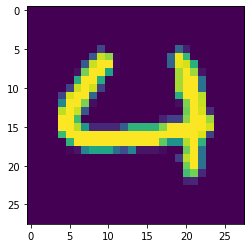

In [7]:
plt.imshow (trainsetX[60])
plt.show()

In [11]:
print (trainsetX[60])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  53   0   0   0   0   0   0   0   0
    0  84  21   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  71 235 213   5   0   0   0   0   0   0
   88 248 169   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 234 253 253   6   0   0   0   0   0   0
   81 246 238 161   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 201 253 251 147   2   0   0   0   

In [12]:
import tensorflow as tf

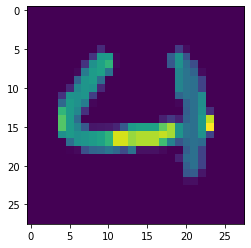

In [13]:
x_train = tf.keras.utils.normalize(trainsetX, axis=1)
x_test =tf.keras.utils.normalize(testsetX, axis=1)
plt.imshow(x_train[60])
plt.show()

In [14]:
print (x_train[60])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D


In [17]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


In [18]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


In [21]:
model.add(Dense(32))
model.add(Activation("relu"))


In [22]:
model.add(Dense(10))
model.add(Activation("sigmoid"))


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                      

In [24]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])


In [25]:
model.fit(x_trainr, trainsety, epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 41s 30ms/step - loss: 0.2389 - accuracy: 0.9280 - val_loss: 0.1377 - val_accuracy: 0.9597
Epoch 2/5
1313/1313 [==============================] - 43s 32ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 3/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0737 - val_accuracy: 0.9781
Epoch 4/5
1313/1313 [==============================] - 43s 32ms/step - loss: 0.0378 - accuracy: 0.9872 - val_loss: 0.0728 - val_accuracy: 0.9797
Epoch 5/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0728 - val_accuracy: 0.9801


In [26]:
prediction = model.predict([x_testr])
prediction

array([[5.76520562e-02, 1.03462189e-01, 8.08631241e-01, ...,
        9.99999821e-01, 4.09893513e-01, 9.97791648e-01],
       [4.06342328e-01, 9.45117354e-01, 9.99996603e-01, ...,
        3.86935472e-03, 2.48047322e-01, 6.17444515e-04],
       [8.90770078e-01, 9.99999285e-01, 4.40834165e-02, ...,
        1.02972865e-01, 9.76357460e-01, 2.32543051e-01],
       ...,
       [1.30242407e-02, 9.47951913e-01, 1.61780715e-02, ...,
        7.32372105e-01, 9.91306007e-01, 9.99958396e-01],
       [3.03378701e-03, 4.27243710e-01, 2.73507833e-03, ...,
        5.67337453e-01, 9.99210596e-01, 9.12912965e-01],
       [8.03901076e-01, 3.29378366e-01, 2.61971951e-01, ...,
        3.24666500e-04, 1.96589857e-01, 4.81158495e-04]], dtype=float32)

In [30]:
np.argmax(prediction[100])

6

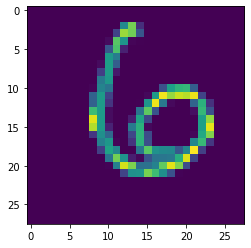

In [31]:
plt.imshow(x_test[100])